In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

# Load the Data

In [2]:
train = pd.read_csv("/Users/xiaofeixue/Desktop/DataProg/8010Final/train.csv")

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<function matplotlib.pyplot.show(*args, **kw)>

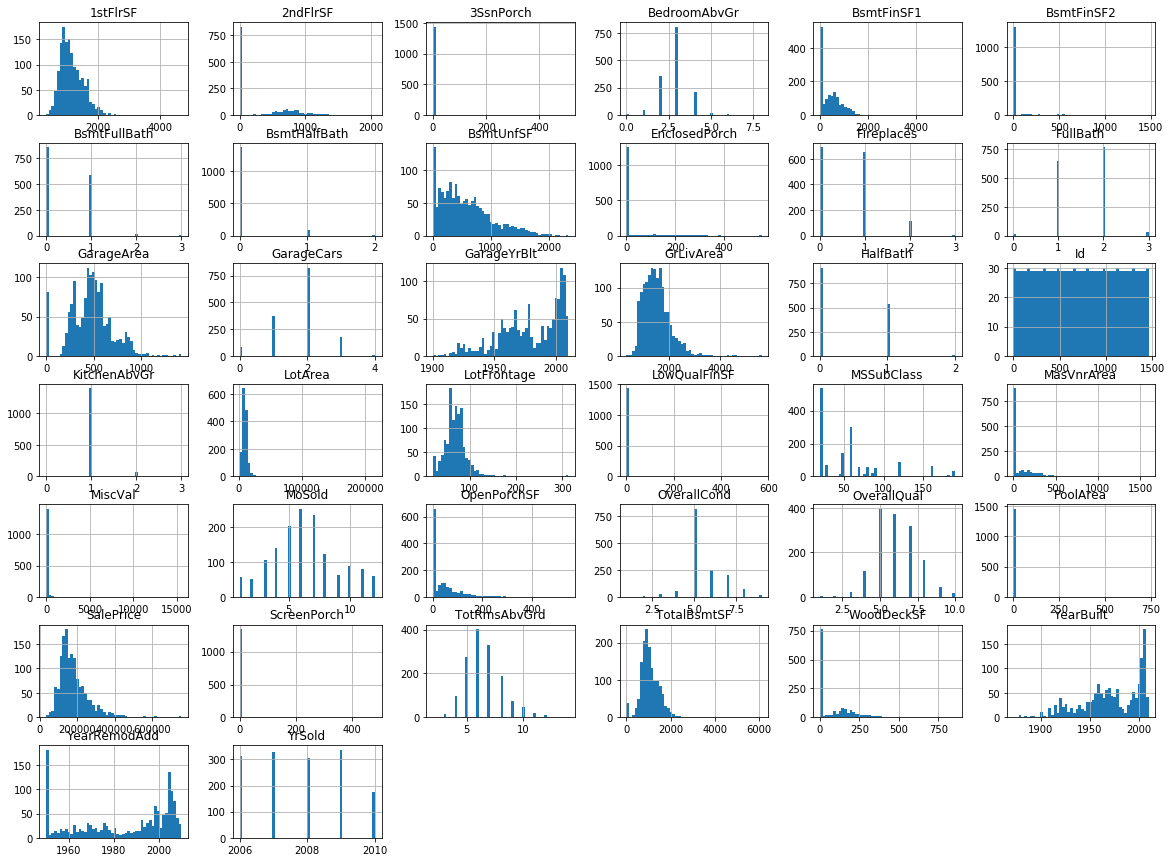

In [119]:
%matplotlib inline
train.hist(bins = 50, figsize = (20, 15))
plt.show

In [6]:
test = pd.read_csv("/Users/xiaofeixue/Desktop/DataProg/8010Final/test.csv")

In [7]:
num_train = train.select_dtypes(include=['int64', 'float64']).copy()

In [8]:
num_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [9]:
num_test = test.select_dtypes(include=['int64', 'float64']).copy()

In [10]:
num_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1444 non-null float64
BsmtFinSF1       1458 non-null float64
BsmtFinSF2       1458 non-null float64
BsmtUnfSF        1458 non-null float64
TotalBsmtSF      1458 non-null float64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BsmtFullBath     1457 non-null float64
BsmtHalfBath     1457 non-null float64
FullBath         1459 non-null int64
HalfBath         1459 non-null int64
BedroomAbvGr     1459 non-null int64
KitchenAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-

In [11]:
cat_train = train.select_dtypes(include=['object']).copy()

In [12]:
cat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

In [13]:
cat_test = test.select_dtypes(include = ["object"]).copy()

In [14]:
cat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 43 columns):
MSZoning         1455 non-null object
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1443 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1415 non-null object
BsmtCond         1414 non-null object
BsmtExposure     141

### Fill Missing Values in Numeric Features

In [15]:
num_index = num_train.columns[num_train.isna().sum() > 0]

In [16]:
num_index

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [17]:
num_index1 = num_test.columns[num_test.isna().sum() > 0]

In [18]:
num_index1

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [19]:
for i in range(len(num_index)):
    if "LotFrontage" in num_index[i]:
        num_train["LotFrontage"].fillna((num_train["LotFrontage"].mean()), inplace = True)
    elif "MasVnrArea" in num_index[i]:
        num_train["MasVnrArea"].fillna(0, inplace = True)
    elif "Garage" in num_index[i]:
        num_train[num_index[i]].fillna(0, inplace = True)

In [20]:
num_train.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [21]:
for i in range(len(num_index1)):
    if "LotFrontage" in num_index1[i]:
        num_test["LotFrontage"].fillna((num_test["LotFrontage"].mean()), inplace = True)
    elif "MasVnrArea" in num_index1[i]:
        num_test["MasVnrArea"].fillna(0, inplace = True)
    elif "Garage" in num_index1[i]:
        num_test[num_index1[i]].fillna(0, inplace = True)
    elif "Bsmt" in num_index1[i]:
        num_test[num_index1[i]].fillna(0, inplace = True)

In [22]:
num_test.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

### MSSubClass is actually a categorical feature that labelled in numbers

In [23]:
num_train["MSSubClass"] = num_train["MSSubClass"].astype("object",copy=False)
cat_train["MSSubClass"] = num_train["MSSubClass"]
num_train = num_train.drop(["MSSubClass"], axis = 1)

In [24]:
num_test["MSSubClass"] = num_test["MSSubClass"].astype("object", copy = False)
cat_test["MSSubClass"] = num_test["MSSubClass"]
num_test = num_test.drop(["MSSubClass"], axis = 1)

In [25]:
id_numtrain = num_train["Id"]

In [26]:
num_train = num_train.drop(["Id"], axis = 1)

In [27]:
id_numtest = num_test["Id"]
num_test = num_test.drop(["Id"], axis = 1)

### Clean Categorical Features

In [28]:
cat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

In [29]:
cat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 44 columns):
MSZoning         1455 non-null object
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1443 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1415 non-null object
BsmtCond         1414 non-null object
BsmtExposure     141

### Drop Features based on Missing Values and Imbalanced dataset.
* If the missing value > 20% of roles, we drop this feature
* If one category > 1400 entries, we drop this feature

### Drop too much missing values

In [30]:
cat_train.columns[cat_train.isnull().mean() > 0.8]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [31]:
cat_test.columns[cat_test.isnull().mean() > 0.8]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [32]:
cat_train = cat_train[cat_train.columns[cat_train.isnull().mean() < 0.8]]

In [33]:
cat_test = cat_test[cat_test.columns[cat_test.isnull().mean() < 0.8]]

### Get rid of imbalanced data

In [34]:
col_list = list(cat_train.columns)
for col in col_list:
    cat_count = cat_train[col].value_counts()
    ccc = cat_count[0]
    if ccc > 1400:
        cat_train = cat_train.drop([col], axis = 1)

KeyError: 0

In [ ]:
cat_train.info()

In [ ]:
col_list1 = list(cat_test.columns)
for col in col_list1:
    test_count = cat_test[col].value_counts()
    ttt = test_count[0]
    if ttt > 1400:
        cat_test = cat_test.drop([col], axis = 1)

In [35]:
cat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 40 columns):
MSZoning         1455 non-null object
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1443 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1415 non-null object
BsmtCond         1414 non-null object
BsmtExposure     1415 non-null object
BsmtFinType1     14

### Deal with missing values in categorical variable

In [36]:
cat_index = cat_train.columns[cat_train.isna().sum() > 0]

In [37]:
cat_index

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [38]:
cat_train[cat_index[0]].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [39]:
for i in range(len(cat_index)):
    if "MasVnrArea" in cat_index[i]:
        cat_train["MasVnrArea"].fillna("None", inplace = True)
    elif "Bsmt" in cat_index[i]:
        cat_train[cat_index[i]].fillna("NA", inplace = True)
    elif "Garage" in cat_index[i]:
        cat_train[cat_index[i]].fillna("NA", inplace = True)
    elif "FireplaceQu" in cat_index[i]:
        cat_train["FireplaceQu"].fillna("NA", inplace = True)
    elif "Electrical" in cat_index[i]:
        cat_train["Electrical"].fillna("SBrkr", inplace = True)

In [40]:
cat_train.isnull().sum()

MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
MSSubClass       0
dtype: int64

In [41]:
cat_index1 = cat_test.columns[cat_test.isna().sum() > 0]

In [42]:
cat_index1

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [43]:
cat_test[cat_index1[16]].value_counts()

TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64

In [ ]:
for i in range(len(cat_index1)):
    if "MSZoning" in cat_index1[i]:
        cat_test["MSZoning"].fillna("RL", inplace = True)
    elif "Exterior" in cat_index1[i]:
        cat_test[cat_index1[i]].fillna("VinylSd", inplace = True)
    elif "MasVnrType" in cat_index1[i]:
        cat_test[cat_index1[i]].fillna("None", inplace = True)
    elif "Bsmt" in cat_index1[i]:
        cat_test[cat_index1[i]].fillna("NA", inplace = True)
    elif "KitchenQual" in cat_index1[i]:
        cat_test["KitchenQual"].fillna("TA", inplace = True)
    elif "Functional" in cat_index1[i]:
        cat_test["Functional"].fillna("Typ", inplace = True)
    elif "FireplaceQu" in cat_index1[i]:
        cat_test["FireplaceQu"].fillna("NA", inplace = True)
    elif "Garage" in cat_index1[i]:
        cat_test[cat_index1[i]].fillna("NA", inplace = True)
    elif "SaleType" in cat_index1[i]:
        cat_test["SaleType"].fillna("WD", inplace = True)

In [161]:
cat_test.isnull().sum()

MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
MSSubClass       0
dtype: int64

### Encode ordinal variables

In [162]:
col_list = list(cat_train.columns)
ord_list = []
for col in col_list:
    if ("Qu" in col or "Cond" in col) and "Condition" not in col:
        ord_list.append(col)

In [163]:
ord_list

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond']

In [164]:
cat_train[ord_list[0]].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [165]:
ord_dict = {"Ex": 100, "Gd": 80, "TA": 60, "Fa": 40, "Po": 20, "NA":0} 

In [166]:
for i in range(len(ord_list)):
    cat_train[ord_list[i]] = cat_train[ord_list[i]].map(ord_dict)

In [167]:
col_li = list(cat_test.columns)
ord_li = []
for coli in col_li:
    if ("Qu" in coli or "Cond" in coli) and "Condition" not in coli:
        ord_li.append(coli)

In [168]:
ord_li

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond']

In [169]:
for i in range(len(ord_li)):
    cat_test[ord_li[i]] = cat_test[ord_li[i]].map(ord_dict)

### OneHotEncode categorical variables

In [170]:
cat_train.shape

(1460, 35)

In [171]:
cat_test.shape

(1459, 35)

In [172]:
dataset = pd.concat([cat_train, cat_test])

In [174]:
dataset.shape

(2919, 35)

In [175]:
dataset = pd.get_dummies(dataset)

In [178]:
dataset.shape

(2919, 206)

In [176]:
cat_train_ohe = dataset.iloc[:1460,:]

In [177]:
cat_train_ohe

,ExterQual,ExterCond,BsmtQual,BsmtCond,KitchenQual,FireplaceQu,GarageQual,GarageCond,MSZoning_C (all),MSZoning_FV,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,80,60,80,60,80,0,60,60,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,60,80,60,60,60,60,60,0,0,...,0,0,0,0,0,0,0,0,0,0
2,80,60,80,60,80,60,60,60,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60,60,60,80,80,80,60,60,0,0,...,1,0,0,0,0,0,0,0,0,0
4,80,60,80,60,80,60,60,60,0,0,...,0,0,0,0,0,0,0,0,0,0
5,60,60,80,60,60,0,60,60,0,0,...,0,0,0,0,0,0,0,0,0,0
6,80,60,100,60,80,80,60,60,0,0,...,0,0,0,0,0,0,0,0,0,0
7,60,60,80,60,60,60,60,60,0,0,...,0,0,0,0,0,0,0,0,0,0
8,60,60,60,60,60,60,40,60,0,0,...,0,0,0,0,0,0,0,0,0,0
9,60,60,60,60,60,60,80,60,0,0,...,0,0,0,0,0,0,0,0,0,1


In [179]:
cat_test_ohe = dataset.iloc[1460:,:]

In [180]:
cat_test_ohe.shape

(1459, 206)

### Merge numerical df and categorical df

In [181]:
new_train = pd.concat([num_train, cat_train_ohe], axis=1)

In [182]:
new_train.shape

(1460, 242)

In [183]:
new_test = pd.concat([num_test, cat_test_ohe], axis=1)

In [184]:
new_test.shape

(1459, 241)

In [185]:
X_train = new_train[new_train.columns.difference(['SalePrice'])].values
y_train = new_train[['SalePrice']].values
X_test = new_test[new_test.columns.difference(['SalePrice'])].values

In [186]:
X_train.shape

(1460, 241)

In [187]:
X_test.shape

(1459, 241)

In [188]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [189]:
pt_X = PowerTransformer(method='yeo-johnson', standardize=False)
sc_y = StandardScaler()
sc_X = StandardScaler()

In [190]:
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [191]:
X_test = sc_X.transform(X_test)

In [192]:
y_train.shape

(1460, 1)

In [194]:
from sklearn.model_selection import KFold, cross_val_score

In [195]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

In [205]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint

In [206]:
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization

In [207]:
model = Sequential()

In [208]:
model.add(Dense(units =300, kernel_initializer=he_normal(seed=None), activation= 'tanh', 
                input_dim=X_train.shape[1]))
model.add(Dropout(0.2))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [209]:
model.add(Dense(units =100, kernel_initializer=he_normal(seed=None), activation= 'tanh'))
model.add(Dropout(0.2))

In [210]:
model.add(Dense(units =80, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

In [211]:
model.add(Dense(units =50, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())

In [212]:
model.add(Dense(units =1, kernel_initializer=he_normal(seed=None), activation= 'elu'))

In [213]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               72600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 80)                8080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 80)                320       
_________________________________________________________________
dropout_3 (Dropout)          (None, 80)                0         
__________

In [214]:
opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [215]:
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['mse'])

In [216]:
model_filepath = 'min_vl_model3.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )

In [248]:
model.fit(X_train,y_train, validation_split=0.30, batch_size=50, nb_epoch=1000, callbacks=[checkpoint])
model.load_weights(model_filepath)

Train on 1021 samples, validate on 439 samples
Epoch 1/1000
  50/1021 [>.............................] - ETA: 1s - loss: 0.0180 - mean_squared_error: 0.2965

/Users/xiaofeixue/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


1021/1021 [==============================] - 1s 699us/step - loss: 0.0436 - mean_squared_error: 0.3572 - val_loss: 0.1652 - val_mean_squared_error: 0.9008

Epoch 00001: val_loss did not improve from 0.02008
Epoch 2/1000
1021/1021 [==============================] - 1s 506us/step - loss: 0.0414 - mean_squared_error: 0.3537 - val_loss: 0.1632 - val_mean_squared_error: 0.8776

Epoch 00002: val_loss did not improve from 0.02008
Epoch 3/1000
1021/1021 [==============================] - 1s 635us/step - loss: 0.0395 - mean_squared_error: 0.3500 - val_loss: 0.0742 - val_mean_squared_error: 0.5807

Epoch 00003: val_loss did not improve from 0.02008
Epoch 4/1000
1021/1021 [==============================] - 0s 472us/step - loss: 0.0284 - mean_squared_error: 0.2817 - val_loss: 0.0602 - val_mean_squared_error: 0.5212

Epoch 00004: val_loss did not improve from 0.02008
Epoch 5/1000
1021/1021 [==============================] - 1s 631us/step - loss: 0.0239 - mean_squared_error: 0.2596 - val_loss: 0.050

In [249]:
y_pred = model.predict(X_test)

In [250]:
y_pred = sc_y.inverse_transform(y_pred)

In [251]:
y_pred

array([[118109.71],
       [136577.27],
       [122676.71],
       ...,
       [159917.05],
       [120703.13],
       [175667.78]], dtype=float32)

In [252]:
y_pred_df = pd.DataFrame(y_pred)

In [253]:
y_pred_df["Id"] = id_numtest

In [254]:
y_pred_df

,0,Id
0,118109.710938,1461
1,136577.265625,1462
2,122676.710938,1463
3,155783.281250,1464
4,155229.312500,1465
5,115771.507812,1466
6,112465.406250,1467
7,114092.437500,1468
8,120212.828125,1469
9,113636.085938,1470


In [255]:
real = pd.read_csv("/Users/xiaofeixue/Desktop/DataProg/8010Final/test_actual_price.csv")

In [256]:
real

,Id,SalePrice
0,1975,615000
1,1664,610000
2,2264,591587
3,2683,584500
4,1678,552000
5,2629,545224
6,2631,535000
7,2295,500067
8,1480,500000
9,2290,492000


In [257]:
eva = pd.merge(y_pred_df, real, on='Id', how='inner', suffixes=['_pred', '_actual'])

In [259]:
mape = np.mean(np.abs(eva["SalePrice"] - eva[0]) / eva['SalePrice'])
print(mape)

0.17288880413725738
